In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from tqdm import trange, tqdm


In [2]:
%pip install ipywidgets
%jupyter nbextension enable --py widgetsnbextension

Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%jupyter` not found.


In [4]:
class SinDataset(Dataset):
    def __init__(self,num_datapoints):
        self.x_data = torch.rand(num_datapoints,1)*18-9
        self.y_data = torch.sin(self.x_data)/20
        self.y_data+=torch.rand_like(self.y_data)/20
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        return self.x_data.shape[0]

In [5]:
n_x_train=30000
n_x_test=8000
batch_size=16
dataset_train=SinDataset(n_x_train)
dataset_test=SinDataset(n_x_test)
dataloader_train=DataLoader(dataset_train,batch_size=batch_size,shuffle=True)
dataloader_test=DataLoader(dataset_test,batch_size=batch_size,shuffle=False)


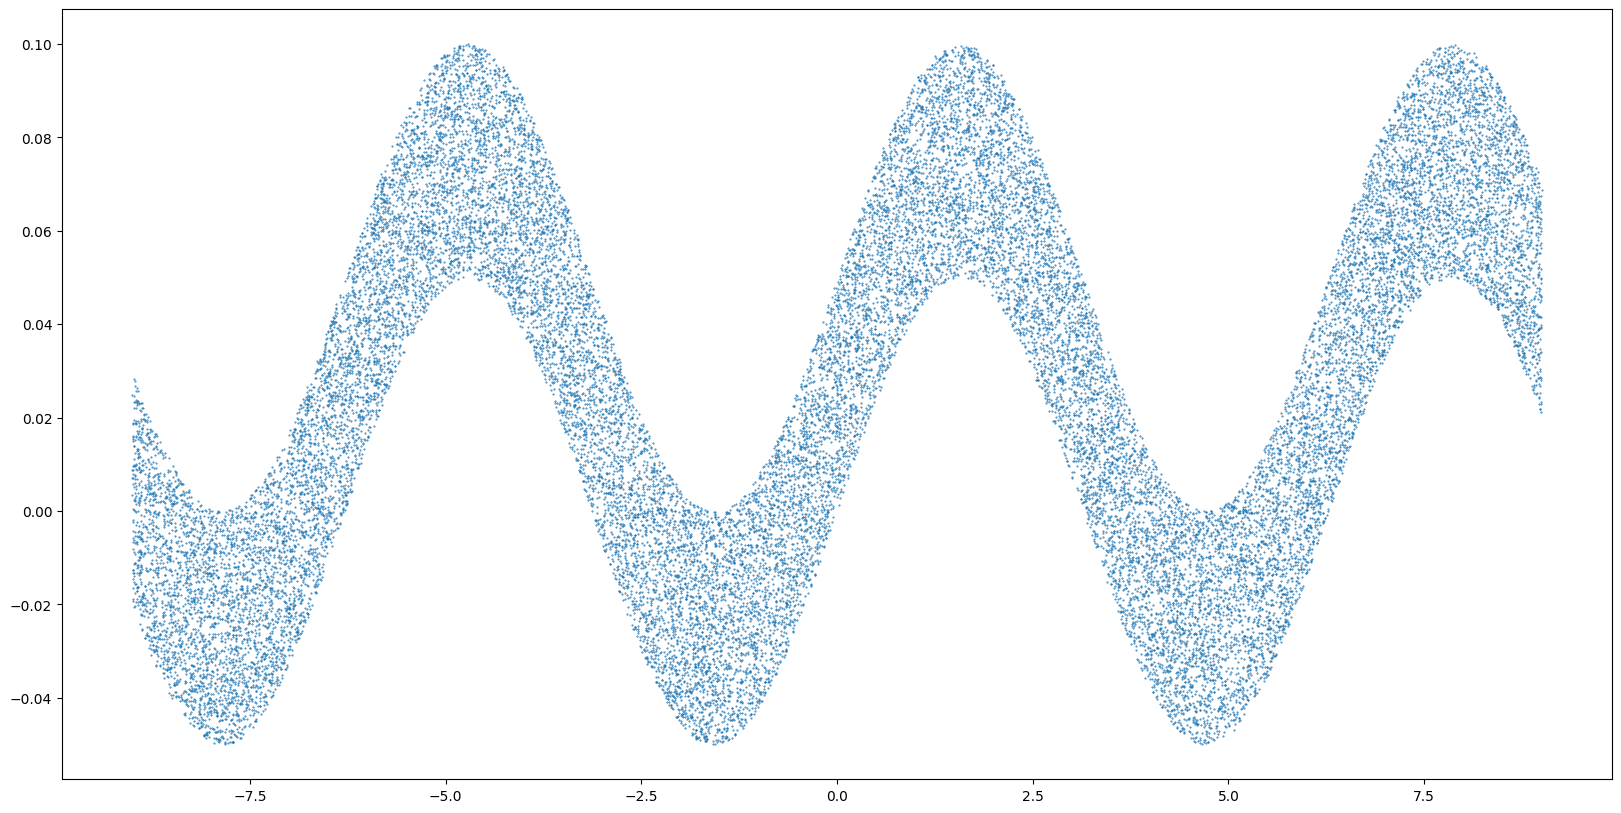

In [6]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(dataset_train.x_data, dataset_train.y_data, s=0.2)

In [24]:
#desiging the  model
class ShallowLinear(nn.Module):
    def __init__(self, input_size, output_size,hidden_size):
        super(ShallowLinear, self).__init__()
        self.linear1 =nn.Linear(input_size,hidden_size)
        self.linear2 =nn.Linear(hidden_size,hidden_size)
        self.linear3 =nn.Linear(hidden_size,hidden_size)
        self.linear4=nn.Linear(hidden_size,output_size)
    def forward(self,x):
        x=self.linear1(x)
        x=torch.tanh(x)
        x=self.linear2(x)
        x=torch.tanh(x)
        x=self.linear3(x)
        x=torch.tanh(x)
        x=self.linear4(x)
        return x 



In [25]:
learning_rate=5e-4
nepoch=10
shallow_model=ShallowLinear(1,1,64)
optimizer=optim.Adam(shallow_model.parameters(),lr=learning_rate)
loss_fn=nn.MSELoss()

In [26]:
training_loss_logger = []
testing_loss_logger = []

In [ ]:
for epoch in trange(nepoch,desc="Epochs",leave=False):#Repeat the whole training process nepoch times.
    for x,y in tqdm(dataloader_train,desc="Training",leave=False):
        y_pred=shallow_model(x)
        loss=loss_fn(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        training_loss_logger.append(loss.item())
    with torch.no_grad():
        test_loss_accum=0
        for i, (x,y) in enumerate(tqdm(dataloader_test,desc="Testing",leave=False)):
            y_pred=shallow_model(x)
            loss=loss_fn(y_pred,y)
            testing_loss_logger.append(loss.item())
            test_loss_accum/=(i+1)
print("Epoch [%d/%d], Average Test Loss %.4f" %(epoch, nepoch, test_loss_accum))



Epoch [9/10], Average Test Loss 0.0000


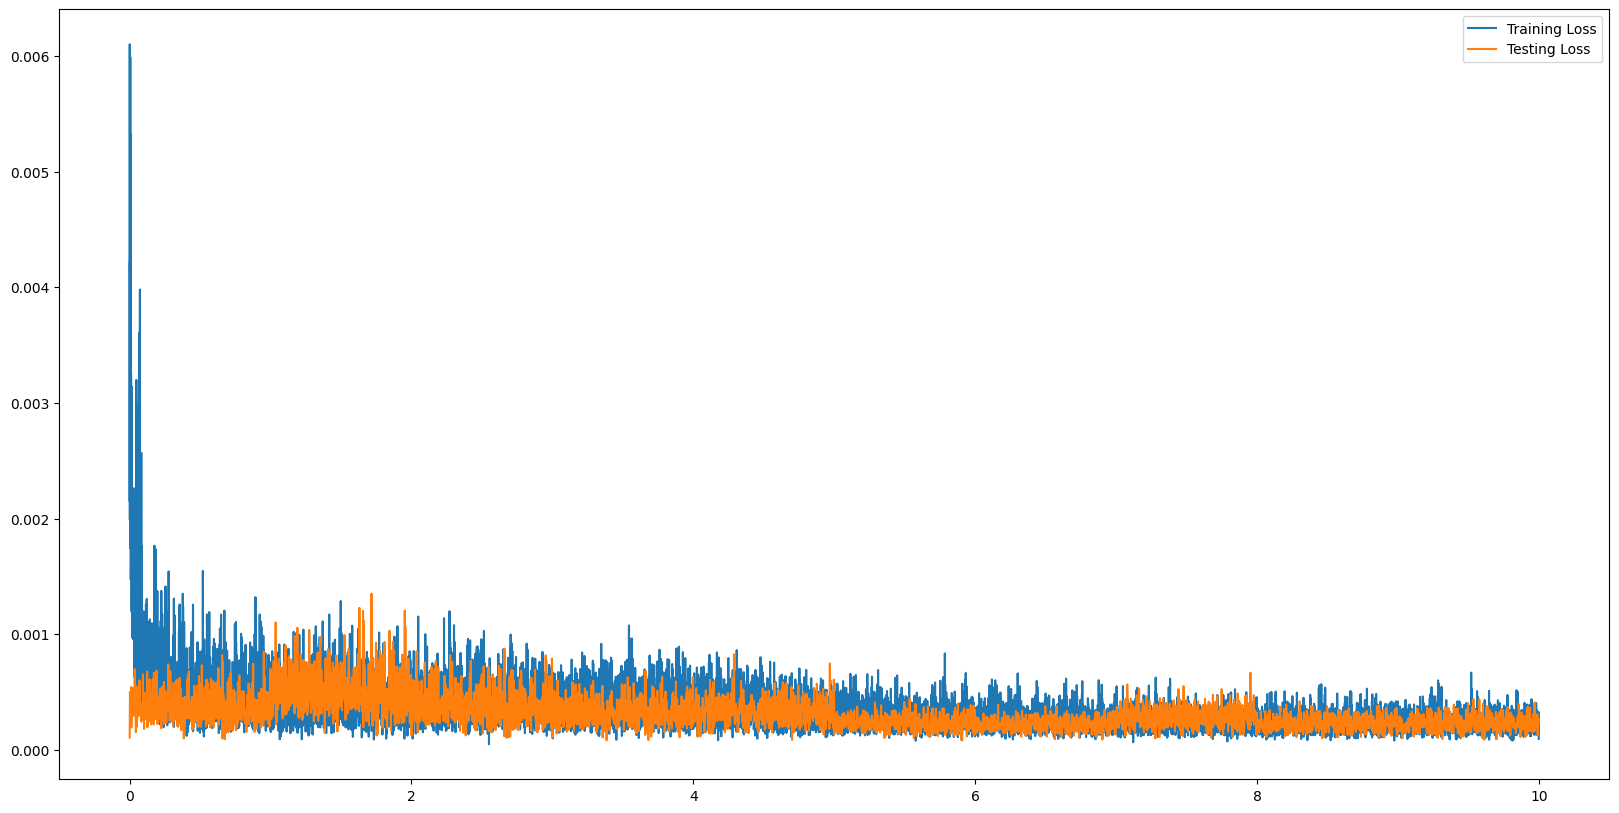

In [30]:
fig=plt.figure(figsize=(20,10))
plt.plot(np.linspace(0,nepoch,len(training_loss_logger)),training_loss_logger,label="Training Loss")
plt.plot(np.linspace(0,nepoch,len(testing_loss_logger)),testing_loss_logger,label="Testing Loss")
plt.legend()